In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\tarus\infosys_springboard_internship\final_fashion_dataset (2).csv")
df.head()

,user_id,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review,Month,Price (USD)
0,93810,8493,Women,Apparel,Bottomwear,Skirts,Black,Fall,2011.0,Casual,Forever New Women Black Skirts,8493.jpg,http://assets.myntassets.com/v1/images/style/p...,5,Amazing quality! Definitely recommend. Would r...,November,46
1,24592,30757,Men,Apparel,Topwear,Kurtas,Grey,Summer,2012.0,Ethnic,Fabindia Men Grey Mangalgiri Kurta,30757.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy..",September,29
2,13278,14881,Women,Accessories,Bags,Handbags,Black,Summer,2011.0,Casual,United Colors of Benetton Women Solid Black Ha...,14881.jpg,http://assets.myntassets.com/v1/images/style/p...,3,"It's okay, nothing special.!",October,39
3,46048,48449,Men,Apparel,Topwear,Tshirts,Blue,Summer,2012.0,Casual,French Connection Men Blue T-shirt,48449.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Comfortable and stylish, worth the price. and ...",August,39
4,42098,4697,Unisex,Accessories,Watches,Watches,Black,Winter,2016.0,Sports,ADIDAS Unisex Digital Duramo Black Watch,4697.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy.!",March,33


In [4]:
df.shape

(36484, 17)

<h3>handling missing values</h3>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36484 entries, 0 to 36483
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             36484 non-null  int64  
 1   id                  36484 non-null  int64  
 2   gender              36484 non-null  object 
 3   masterCategory      36484 non-null  object 
 4   subCategory         36484 non-null  object 
 5   articleType         36484 non-null  object 
 6   baseColour          36484 non-null  object 
 7   season              36484 non-null  object 
 8   year                36484 non-null  float64
 9   usage               36484 non-null  object 
 10  productDisplayName  36484 non-null  object 
 11  filename            36484 non-null  object 
 12  link                36484 non-null  object 
 13  ratings             36484 non-null  int64  
 14  review              36484 non-null  object 
 15  Month               36484 non-null  object 
 16  Pric

In [6]:
df.isnull().sum()

user_id               0
id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
filename              0
link                  0
ratings               0
review                0
Month                 0
Price (USD)           0
dtype: int64

In [7]:
df.usage.value_counts()

usage
Casual          27597
Sports           3707
Ethnic           3040
Formal           2043
Smart Casual       64
Travel             26
Party               7
Name: count, dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.describe()

,user_id,id,year,ratings,Price (USD)
count,36484.000000,36484.000000,36484.000000,36484.000000,36484.000000
mean,55673.109336,27860.189124,2012.461737,3.600839,33.828610
std,25987.221109,16562.799723,1.860980,1.279767,11.320579
min,10022.000000,1163.000000,2007.000000,1.000000,10.000000
25%,32865.000000,13247.000000,2011.000000,3.000000,25.000000
50%,55706.000000,26471.500000,2012.000000,4.000000,34.000000
75%,78386.000000,41718.250000,2012.000000,5.000000,42.000000
max,99995.000000,60000.000000,2018.000000,5.000000,66.000000


In [10]:
catnames = [ 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season','usage','Month']
numnames = ['id','year','ratings','Price (USD)']

<h3>categorical data analysis</h3>

In [11]:
for i in catnames:
    print(f'{i}: {df[i].unique()}')

gender: ['Women' 'Men' 'Unisex' 'Boys' 'Girls']
masterCategory: ['Apparel' 'Accessories' 'Footwear']
subCategory: ['Bottomwear' 'Topwear' 'Bags' 'Watches' 'Shoes' 'Flip Flops' 'Jewellery'
 'Eyewear' 'Belts' 'Saree' 'Loungewear and Nightwear' 'Wallets' 'Socks']
articleType: ['Skirts' 'Kurtas' 'Handbags' 'Tshirts' 'Watches' 'Formal Shoes'
 'Flip Flops' 'Heels' 'Leggings' 'Backpacks' 'Earrings' 'Clutches'
 'Shirts' 'Casual Shoes' 'Dupatta' 'Jeans' 'Tops' 'Ring' 'Flats'
 'Suspenders' 'Sports Shoes' 'Sunglasses' 'Shorts' 'Belts' 'Sarees'
 'Nightdress' 'Jackets' 'Trousers' 'Messenger Bag' 'Track Pants' 'Kurtis'
 'Capris' 'Nehru Jackets' 'Sweatshirts' 'Wallets' 'Socks'
 'Necklace and Chains' 'Stockings' 'Waist Pouch' 'Patiala' 'Tunics'
 'Booties' 'Lounge Pants' 'Sweaters' 'Pendant' 'Duffel Bag' 'Tracksuits'
 'Baby Dolls' 'Bath Robe' 'Laptop Bag' 'Night suits' 'Tights' 'Jeggings'
 'Mobile Pouch' 'Jewellery Set' 'Lounge Shorts' 'Swimwear' 'Bangle'
 'Churidar' 'Salwar' 'Shrug' 'Bracelet' 'Waistc

<h3>outlier detection</h3>

In [12]:
dict_unique = {
    "numerical_columns": numnames,
    "unique_values": [df[i].nunique() for i in numnames]
}

In [13]:
df_unique = pd.DataFrame(dict_unique)
df_unique

,numerical_columns,unique_values
0,id,36484
1,year,12
2,ratings,5
3,Price (USD),57


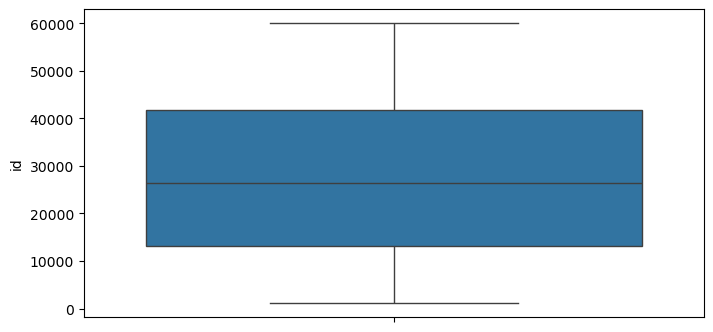

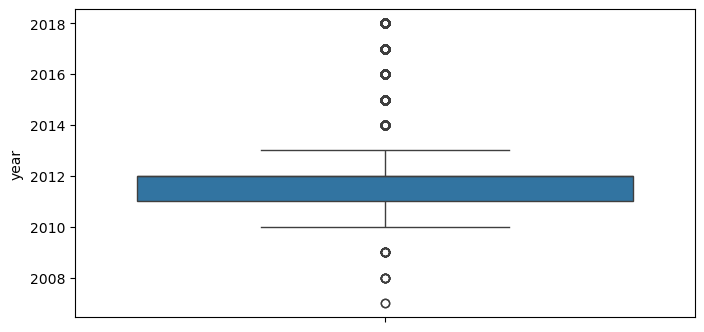

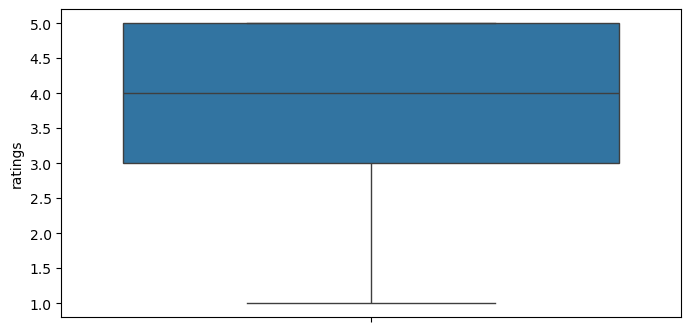

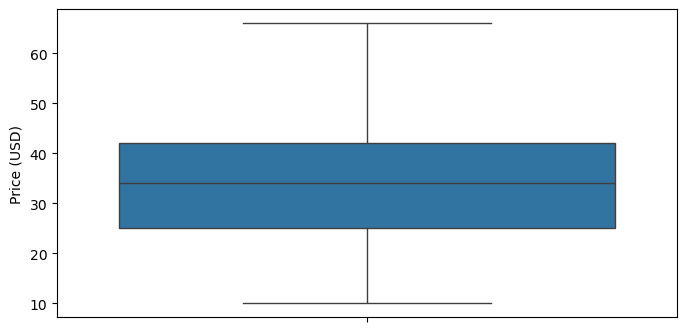

In [14]:
for i in numnames:
    plt.figure(figsize=(8,4))
    sns.boxplot(df[i])

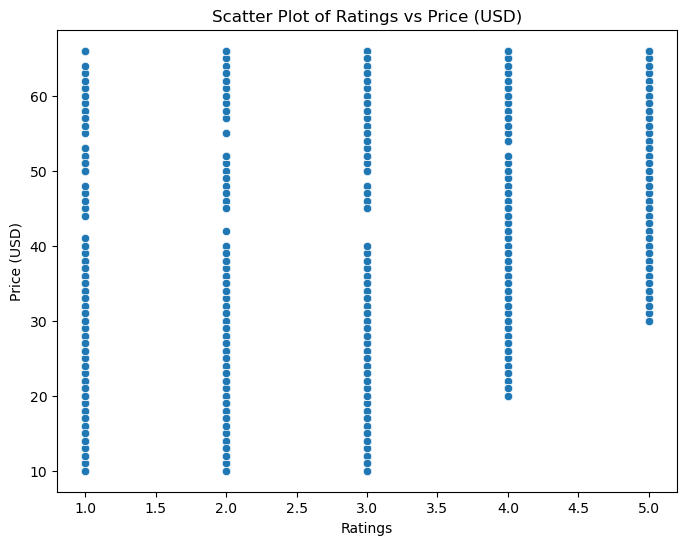

In [15]:
# Scatter plot for Ratings vs Price (USD)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='ratings', y='Price (USD)')
plt.title('Scatter Plot of Ratings vs Price (USD)')
plt.xlabel('Ratings')
plt.ylabel('Price (USD)')
plt.show()


In [16]:
q25,q75 = np.percentile(df["year"],[25,75])

In [17]:
iqr = q75 - q25
iqr

1.0

In [18]:
q0 = q25 - 1.5*iqr
q100 = q75 + 1.5*iqr
q0,q100

(2009.5, 2013.5)

In [19]:
df = df[(df['year'] >= q0) & (df['year'] <= q100)]

In [20]:
df

,user_id,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review,Month,Price (USD)
0,93810,8493,Women,Apparel,Bottomwear,Skirts,Black,Fall,2011.0,Casual,Forever New Women Black Skirts,8493.jpg,http://assets.myntassets.com/v1/images/style/p...,5,Amazing quality! Definitely recommend. Would r...,November,46
1,24592,30757,Men,Apparel,Topwear,Kurtas,Grey,Summer,2012.0,Ethnic,Fabindia Men Grey Mangalgiri Kurta,30757.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy..",September,29
2,13278,14881,Women,Accessories,Bags,Handbags,Black,Summer,2011.0,Casual,United Colors of Benetton Women Solid Black Ha...,14881.jpg,http://assets.myntassets.com/v1/images/style/p...,3,"It's okay, nothing special.!",October,39
3,46048,48449,Men,Apparel,Topwear,Tshirts,Blue,Summer,2012.0,Casual,French Connection Men Blue T-shirt,48449.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Comfortable and stylish, worth the price. and ...",August,39
6,28289,12868,Men,Footwear,Shoes,Formal Shoes,Black,Spring,2012.0,Formal,Lee Cooper Men Formal Black Shoes,12868.jpg,http://assets.myntassets.com/v1/images/style/p...,3,Satisfactory for the price. for special occasi...,August,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36475,73318,54078,Men,Footwear,Shoes,Sports Shoes,Orange,Summer,2012.0,Sports,ADIDAS Men Orange F50 Adizero HG Football Shoes,54078.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Exceeded expectations, love the fit! but could...",September,41
36476,18851,13183,Men,Footwear,Shoes,Sports Shoes,White,Fall,2011.0,Sports,Fila Men Dls 96 White Sports Shoes,13183.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Perfect for any occasion, great buy. and I'm v...",January,53
36477,55457,10264,Men,Footwear,Shoes,Formal Shoes,Black,Summer,2013.0,Formal,Clarks Men Goya Band Leather Black Formal Shoes,10264.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Exceeded expectations, love the fit!.",November,43
36479,40311,45378,Women,Footwear,Shoes,Flats,Black,Summer,2012.0,Casual,Rocia Women Black Sandals,45378.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"High quality fabric, very satisfied. and I'm v...",November,48


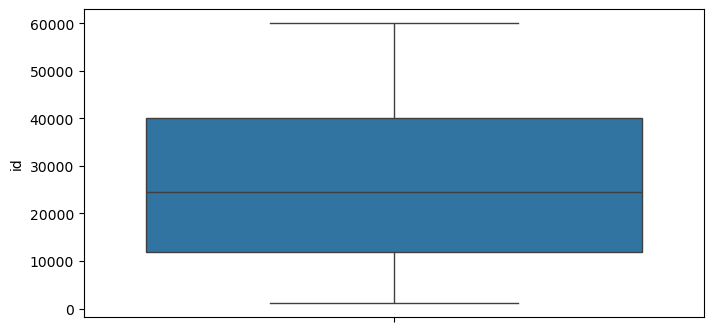

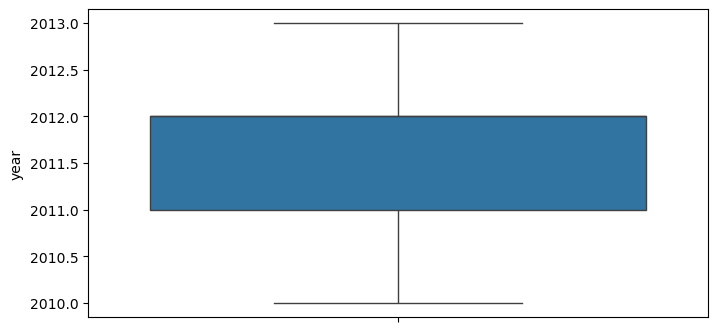

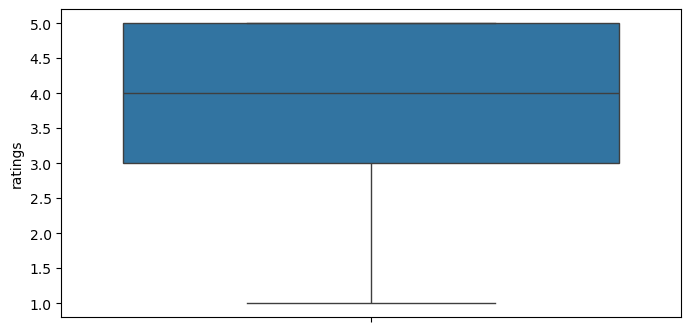

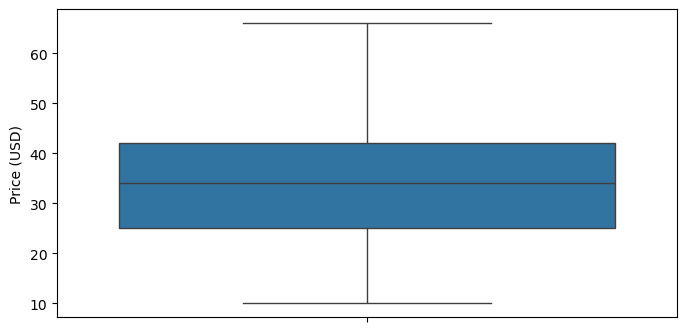

In [21]:
for i in numnames:
    plt.figure(figsize=(8,4))
    sns.boxplot(df[i])

<h3>distribution analysis</h3>

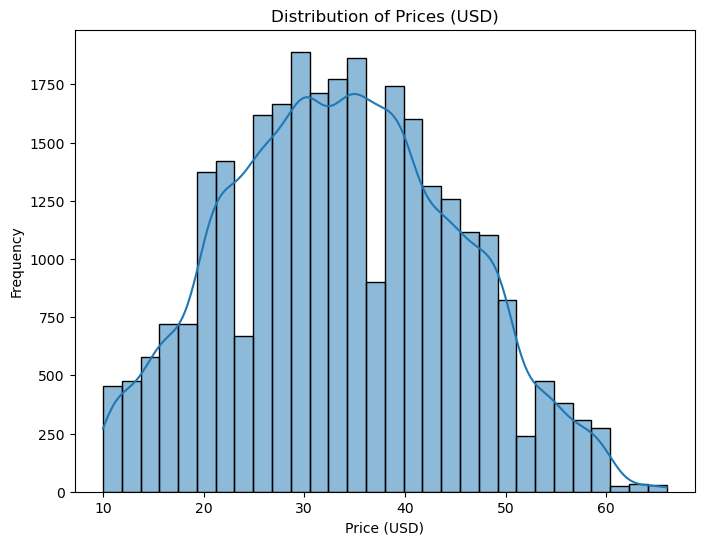

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Price (USD)'], bins=30, kde=True)
plt.title('Distribution of Prices (USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

id:  0.2925079053459858
year:  -0.044228810268022695
ratings:  -0.6518348738113221
Price (USD):  0.10747816858420171


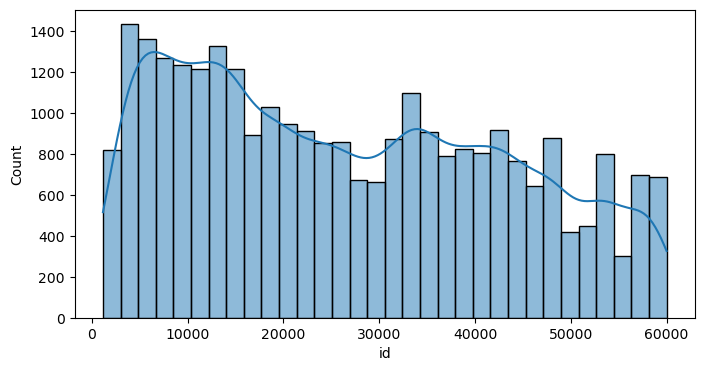

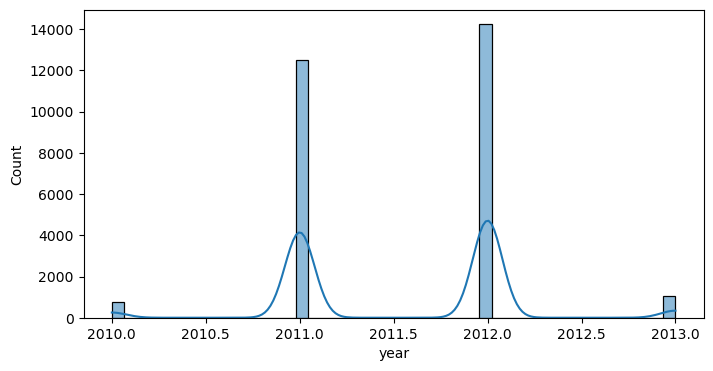

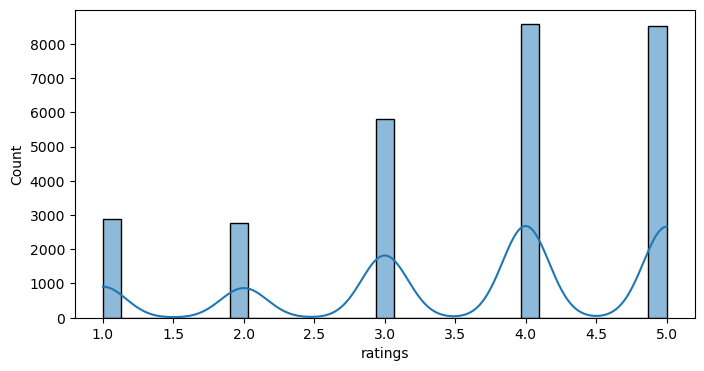

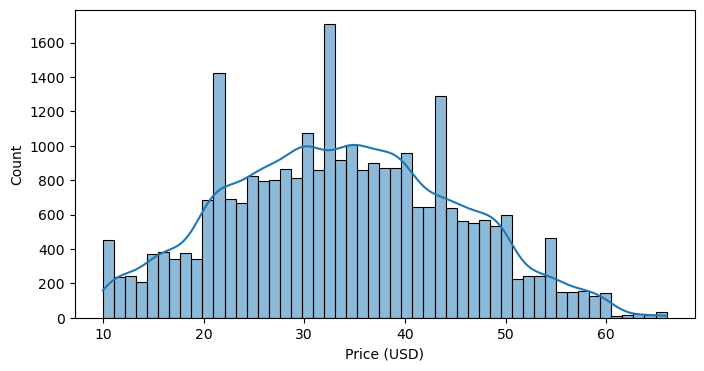

In [23]:
# plotting histograms to check the distribution of numerical data
from scipy.stats import skew
for i in numnames:
    plt.figure(figsize=(8,4))
    print(f"{i}: ",df[i].skew())
    sns.histplot(df[i],kde=True)

<h3>categorical analysis</h3>

Frequency Distribution of categorical columns


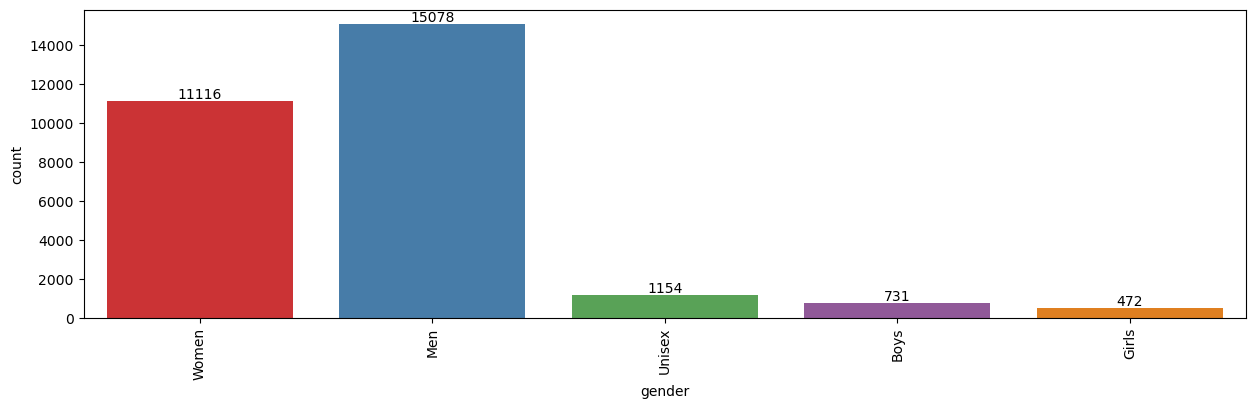

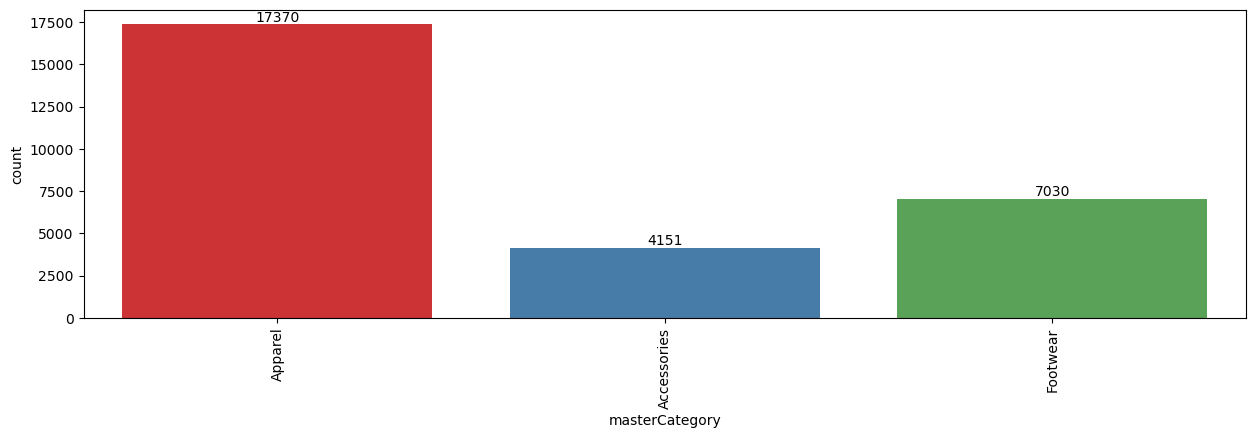

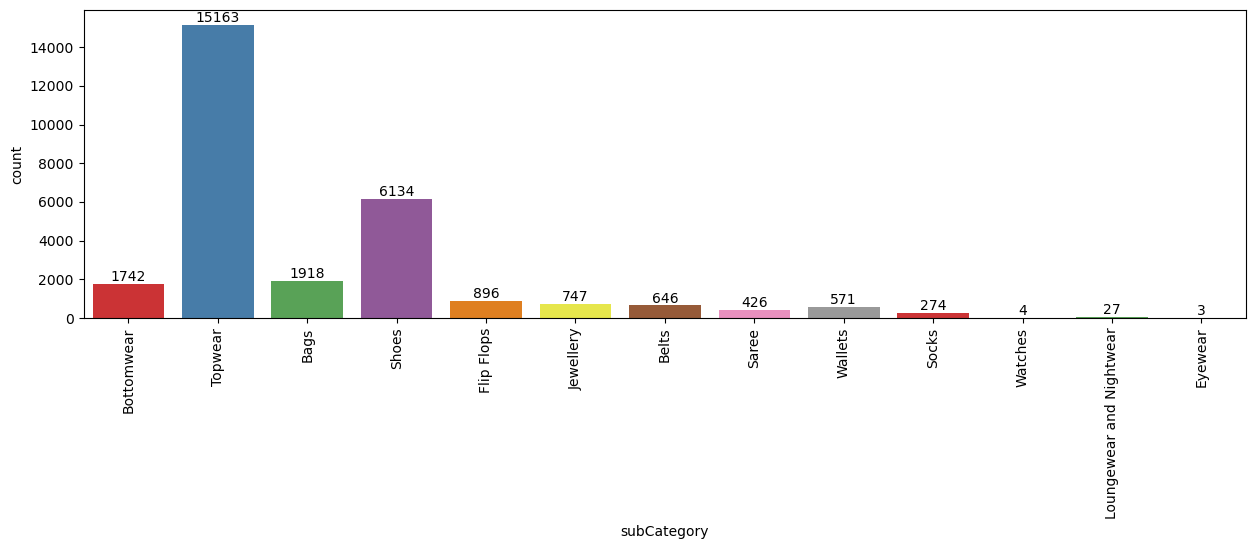

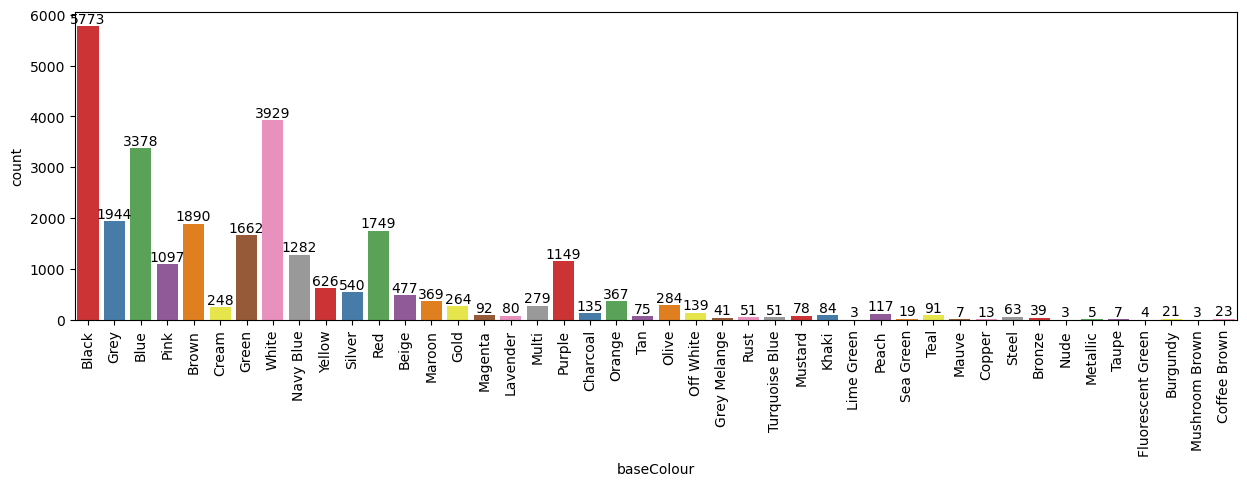

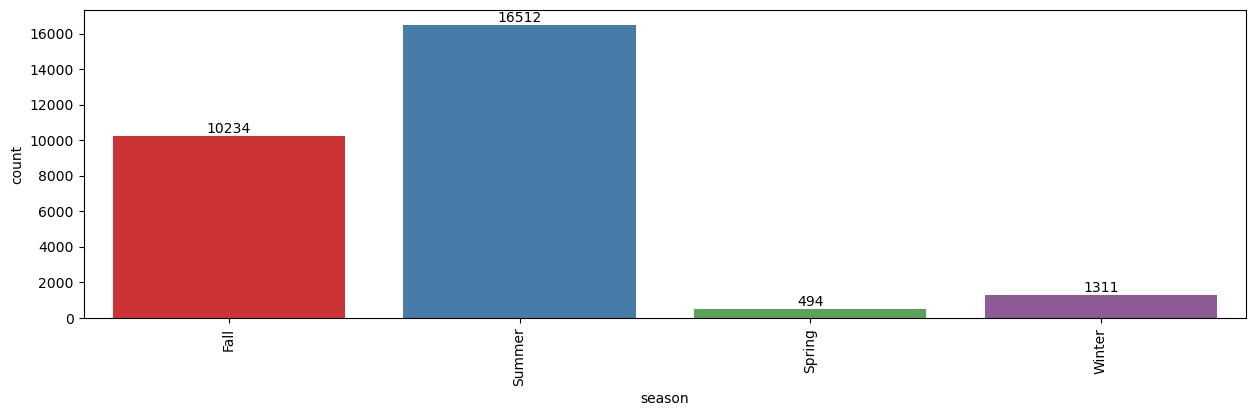

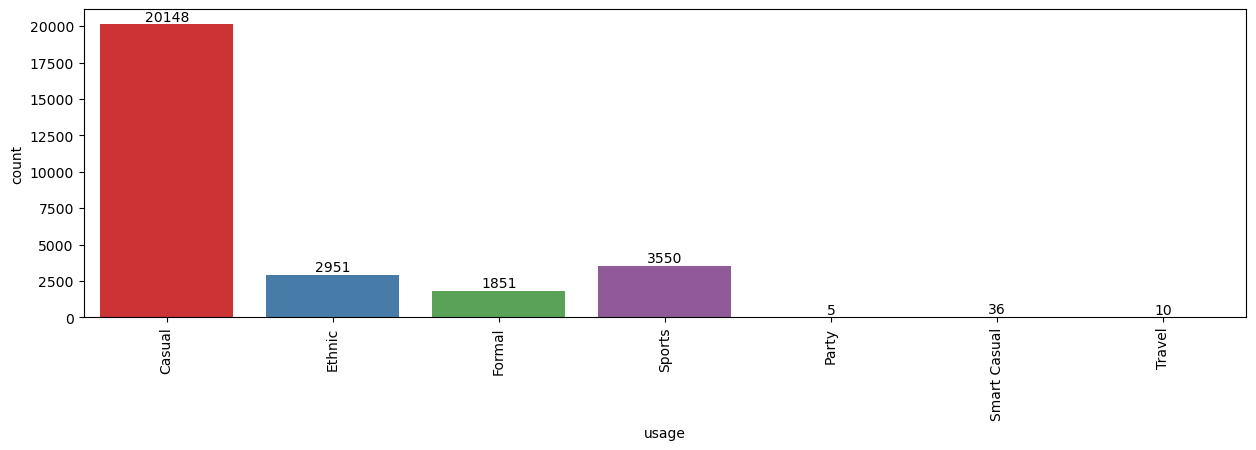

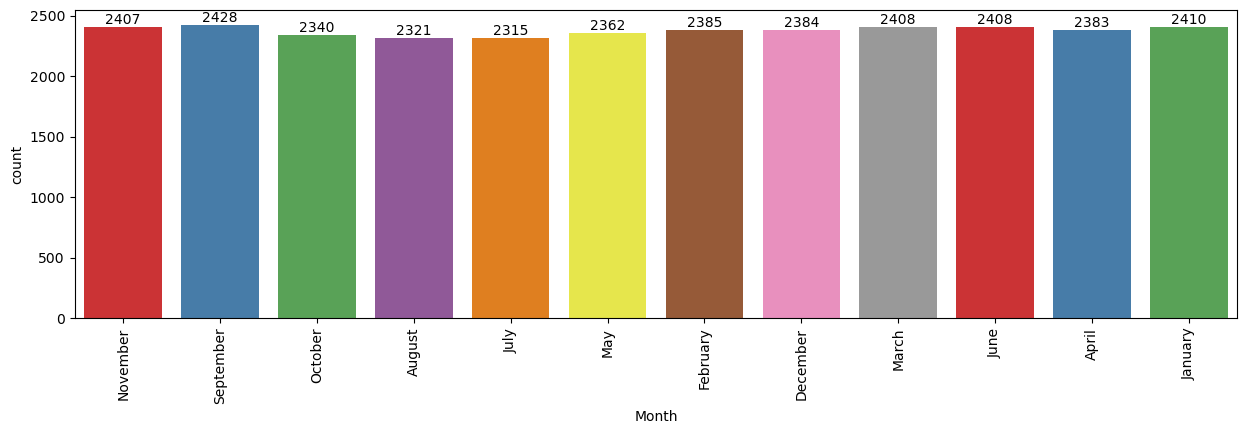

In [24]:
# understanding the distribution and frequency of categorical columns(demographics)
print('Frequency Distribution of categorical columns')
for i in catnames:
    if i == "articleType":
        continue
    plt.figure(figsize=(15, 4))
    ax = sns.countplot(data=df, x=i, palette='Set1')
    plt.xticks(rotation=90)
    for j in ax.containers:
        ax.bar_label(j)

<h3>bivariate analysis</h3>

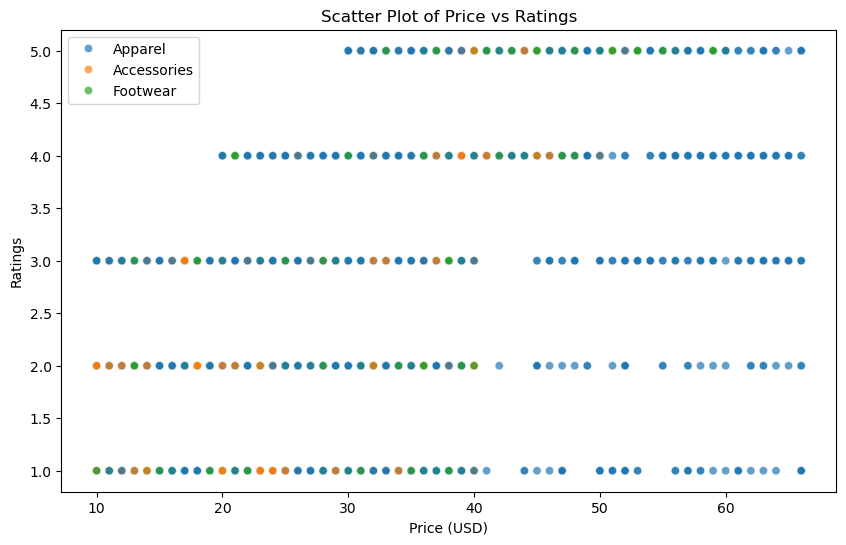

In [25]:
# Scatter plot of Price vs Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price (USD)', y='ratings', hue='masterCategory', alpha=0.7)
plt.title('Scatter Plot of Price vs Ratings')
plt.xlabel('Price (USD)')
plt.ylabel('Ratings')
plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, 'Box Plot of Master category by Price(USD)')

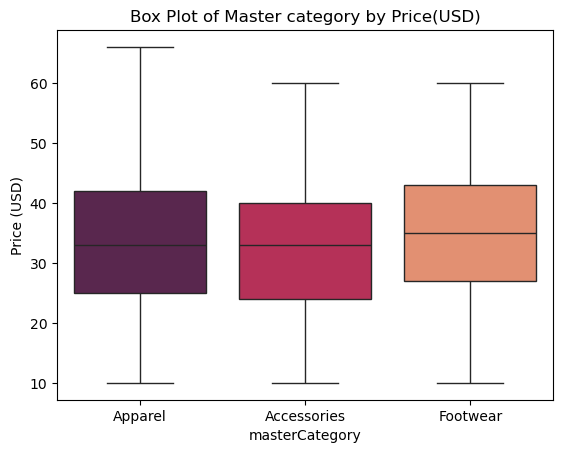

In [26]:
sns.boxplot(df,x='masterCategory',y='Price (USD)',palette='rocket')
plt.title("Box Plot of Master category by Price(USD)")

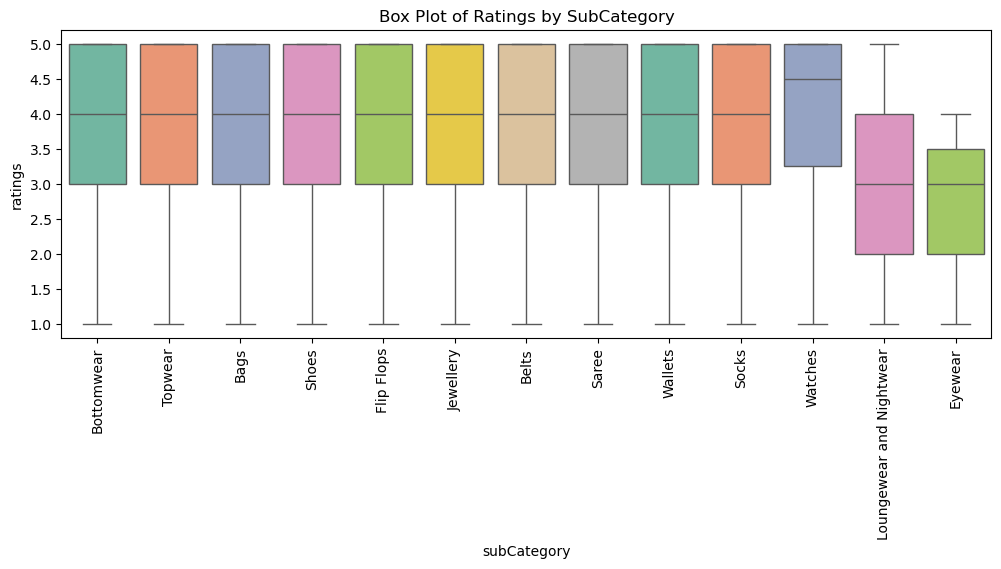

In [27]:
plt.figure(figsize=(12,4))
sns.boxplot(df,x='subCategory',y='ratings',palette='Set2')
plt.title("Box Plot of Ratings by SubCategory")
plt.xticks(rotation=90)
plt.show()

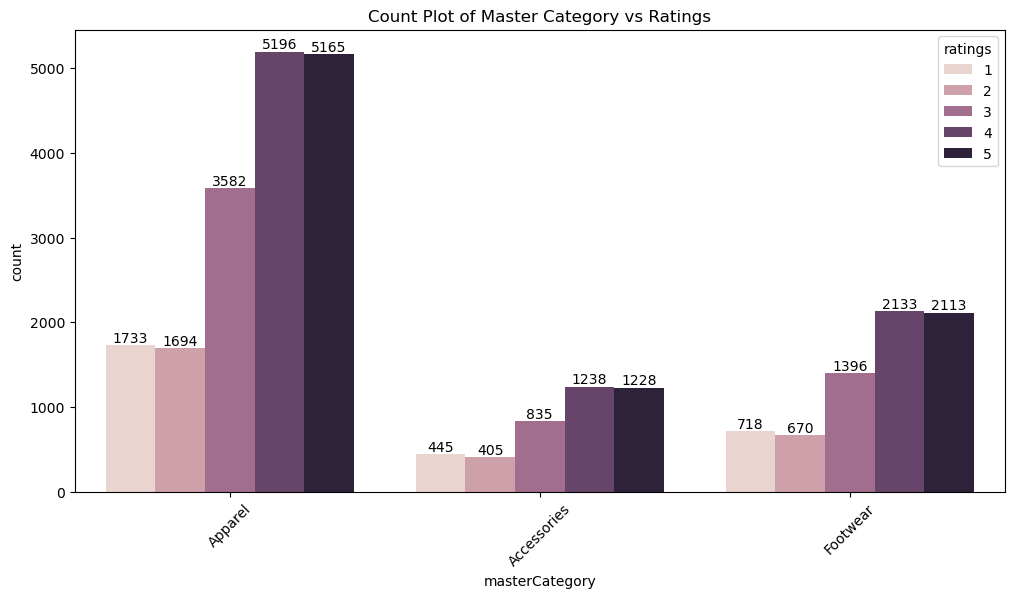

In [28]:
# Count plot of Master Category vs Ratings
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='masterCategory', hue='ratings')
for i in ax.containers:
    plt.bar_label(i)
plt.title('Count Plot of Master Category vs Ratings')
plt.xticks(rotation=45)
plt.show()

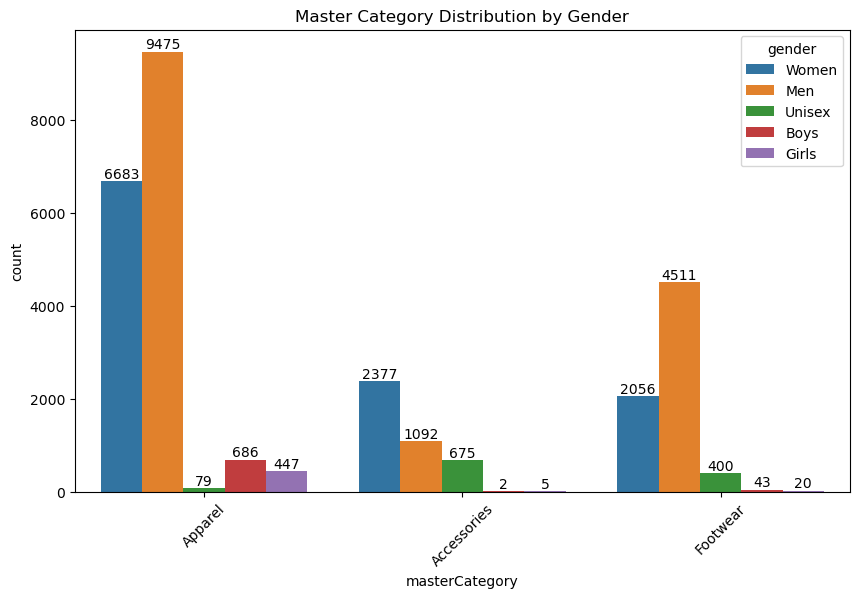

In [29]:
# Master Category vs Gender
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='masterCategory', hue='gender')
for i in ax.containers:
    plt.bar_label(i)
plt.title('Master Category Distribution by Gender')
plt.xticks(rotation=45)
plt.show()

In [30]:
df.subCategory.unique()

array(['Bottomwear', 'Topwear', 'Bags', 'Shoes', 'Flip Flops',
       'Jewellery', 'Belts', 'Saree', 'Wallets', 'Socks', 'Watches',
       'Loungewear and Nightwear', 'Eyewear'], dtype=object)

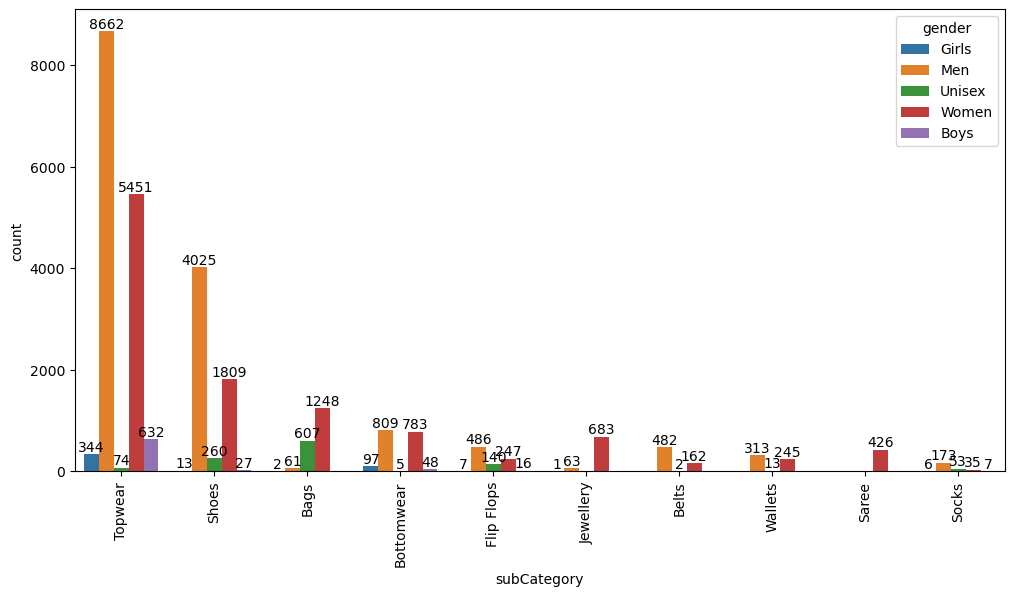

In [31]:
plt.figure(figsize=(12,6))
df_grouped = df.groupby(['subCategory', 'gender']).size().reset_index(name='count')
ax = sns.barplot(data=df_grouped, x='subCategory', y='count', hue='gender', order=df['subCategory'].value_counts().index[:10])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

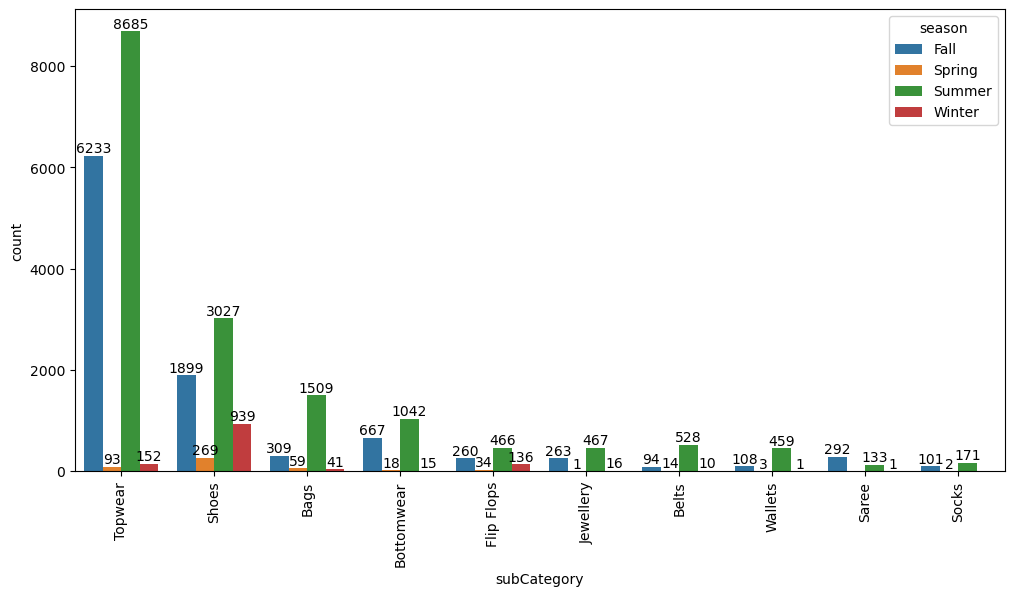

In [32]:
# subcategory vs season
plt.figure(figsize=(12,6))
df_grouped = df.groupby(['subCategory', 'season']).size().reset_index(name='count')
ax = sns.barplot(data=df_grouped, x='subCategory', y='count', hue='season', order=df['subCategory'].value_counts().index[:10])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

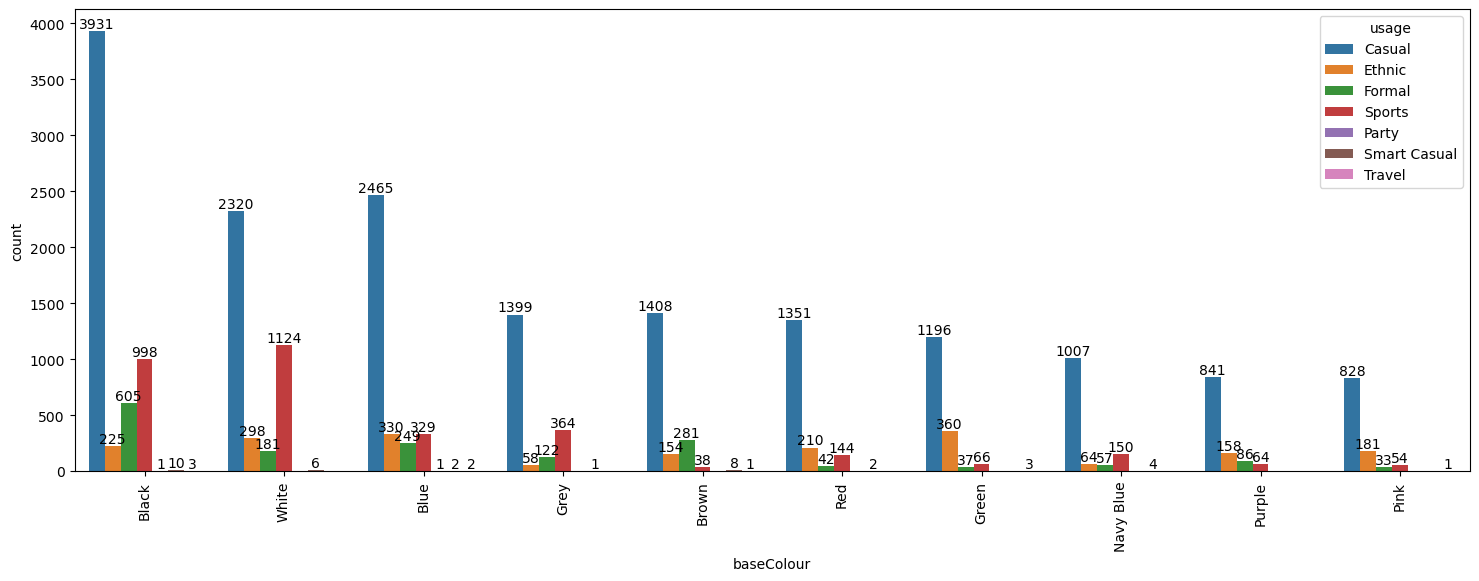

In [33]:
# base colour vs usage
plt.figure(figsize=(18,6))
df_grouped = df.groupby(['baseColour', 'usage']).size().reset_index(name='count')
ax = sns.barplot(data=df_grouped, x='baseColour', y='count', hue='usage', order=df['baseColour'].value_counts().index[:10])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

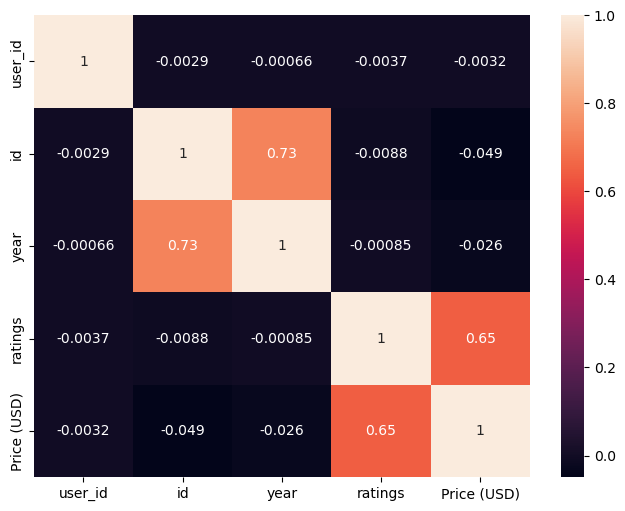

In [34]:
plt.figure(figsize=(8,6))
# Calculate correlation on numeric columns only, including the new 'gender_numeric' column
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.show()

<h3>Time-based analysis/Trend analysis based on Month data</h3>

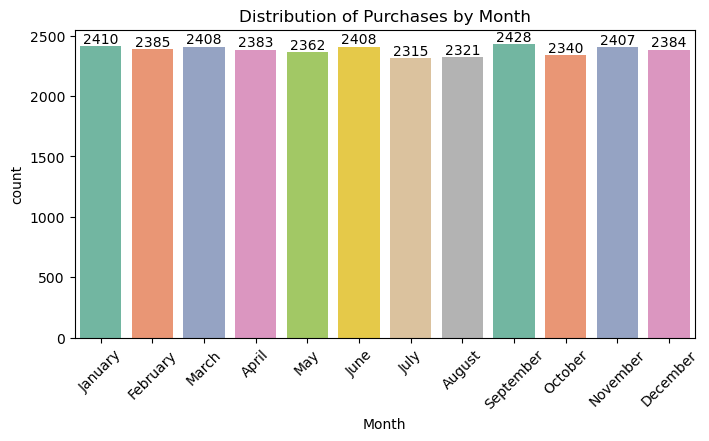

In [35]:
# Count plot for Month
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x='Month', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
                   palette="Set2")
for i in ax.containers:
    plt.bar_label(i)
plt.title('Distribution of Purchases by Month')
plt.xticks(rotation=45)
plt.show()

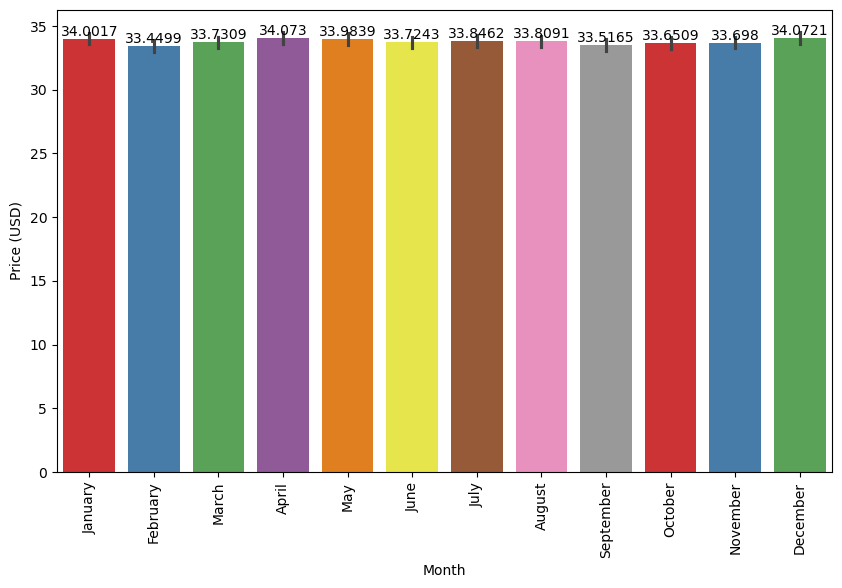

In [36]:
# price(usd) by month
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df,x="Month",y="Price (USD)",palette="Set1",
                 order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

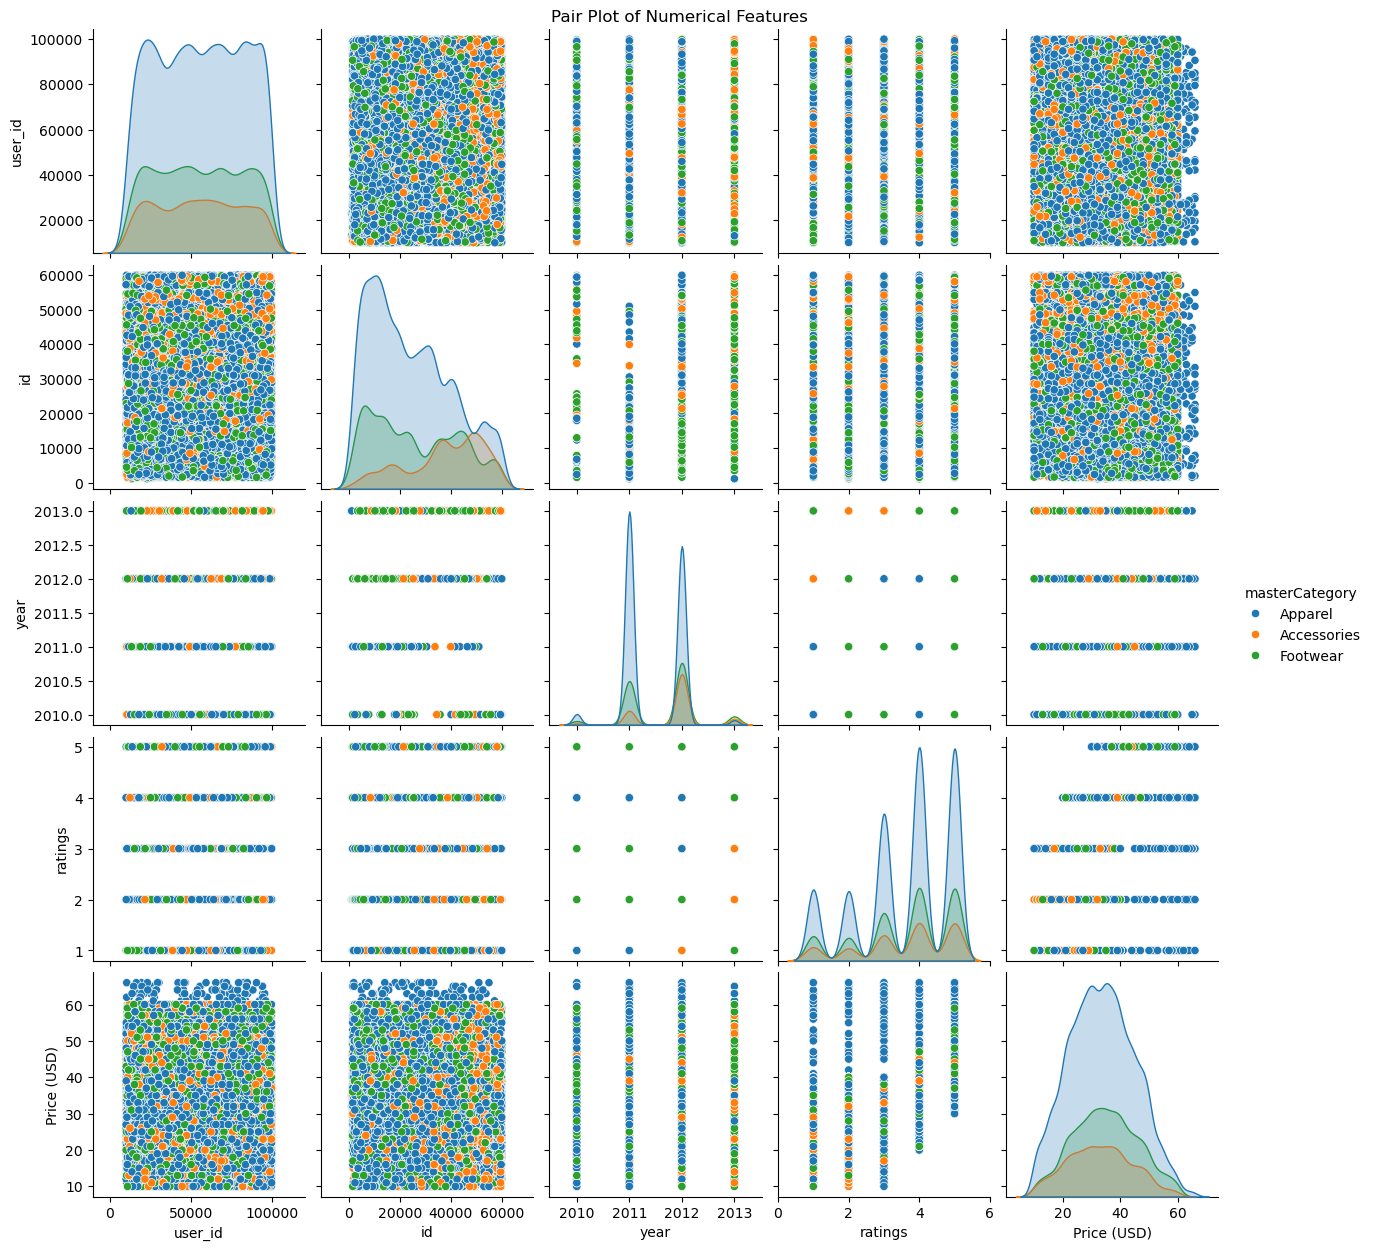

In [37]:
# Reset the index of your DataFrame to ensure it is unique:
df = df.reset_index(drop=True)

# Then, proceed with creating the pair plot:
sns.pairplot(df, diag_kind='kde', hue='masterCategory')
plt.suptitle('Pair Plot of Numerical Features', y=1.0)
plt.show()

<h3>Random oversampling for year column</h3>

In [76]:
df["year"] = df["year"].astype(int)
df.head()

,user_id,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review,Month,Price (USD)
0,93810,8493,Women,Apparel,Bottomwear,Skirts,Black,Fall,2011,Casual,Forever New Women Black Skirts,8493.jpg,http://assets.myntassets.com/v1/images/style/p...,5,Amazing quality! Definitely recommend. Would r...,November,46
1,24592,30757,Men,Apparel,Topwear,Kurtas,Grey,Summer,2012,Ethnic,Fabindia Men Grey Mangalgiri Kurta,30757.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy..",September,29
2,13278,14881,Women,Accessories,Bags,Handbags,Black,Summer,2011,Casual,United Colors of Benetton Women Solid Black Ha...,14881.jpg,http://assets.myntassets.com/v1/images/style/p...,3,"It's okay, nothing special.!",October,39
3,46048,48449,Men,Apparel,Topwear,Tshirts,Blue,Summer,2012,Casual,French Connection Men Blue T-shirt,48449.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Comfortable and stylish, worth the price. and ...",August,39
4,28289,12868,Men,Footwear,Shoes,Formal Shoes,Black,Spring,2012,Formal,Lee Cooper Men Formal Black Shoes,12868.jpg,http://assets.myntassets.com/v1/images/style/p...,3,Satisfactory for the price. for special occasi...,August,24


In [77]:
df.year.value_counts()

year
2012    14238
2011    12517
2013     1035
2010      761
Name: count, dtype: int64

In [78]:
from sklearn.utils import resample

# Separate the data into a list of dataframes by year
dfs = [df[df['year'] == year] for year in df['year'].unique()]

# Determine the target number of samples for each year (e.g., the average count)
target_samples = int(np.mean([len(sub_df) for sub_df in dfs]))

# Resample each year group to the target size
dfs_resampled = [resample(sub_df, replace=True, n_samples=target_samples, random_state=42) for sub_df in dfs]

# Combine all resampled groups into a single dataframe
df_balanced = pd.concat(dfs_resampled)

In [79]:
df_balanced.year.value_counts()

year
2011    7137
2012    7137
2010    7137
2013    7137
Name: count, dtype: int64

In [80]:
df_balanced.head()

,user_id,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review,Month,Price (USD)
16573,19828,23248,Men,Footwear,Shoes,Formal Shoes,Brown,Fall,2011,Formal,Arrow Men Formal Brown Shoe,23248.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"High quality fabric, very satisfied..",February,39
1968,54541,20191,Men,Apparel,Topwear,Tshirts,Grey,Fall,2011,Casual,Wrangler Men Grey Polo T-shirt,20191.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Perfect for any occasion, great buy. for casua...",August,44
12353,72493,13836,Men,Apparel,Bottomwear,Shorts,Navy Blue,Fall,2011,Casual,Probase Men Solid Navy Blue Shorts,13836.jpg,http://assets.myntassets.com/v1/images/style/p...,1,"Very disappointed, won't buy again. for specia...",March,56
11940,40735,15577,Boys,Apparel,Topwear,Tshirts,Blue,Fall,2011,Casual,Chhota Bheem Kids Boys Warrior Bheem TShirt,15577.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Perfect for any occasion, great buy. for speci...",October,55
27269,98470,7768,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011,Sports,Nike Men's As Vapor Ulti Grey Black T-Shirt,7768.jpg,http://assets.myntassets.com/v1/images/style/p...,3,"Fair product, but don't expect much. for every...",November,20


<Axes: xlabel='year', ylabel='Count'>

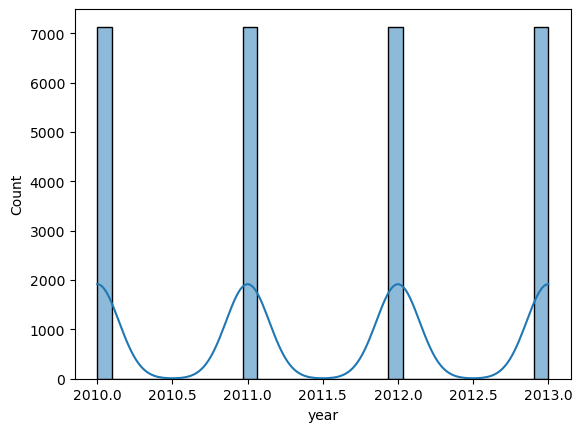

In [81]:
sns.histplot(df_balanced["year"],kde=True)

In [82]:
df_balanced.shape

(28548, 17)

# Advanced EDA

<h3>clustering analysis</h3>

In [83]:
df_balanced.shape

(28548, 17)

In [84]:
for i in catnames:
    print(f'{i}: {df_balanced[i].unique()}')

gender: ['Men' 'Boys' 'Unisex' 'Women' 'Girls']
masterCategory: ['Footwear' 'Apparel' 'Accessories']
subCategory: ['Shoes' 'Topwear' 'Bottomwear' 'Bags' 'Socks' 'Flip Flops'
 'Loungewear and Nightwear' 'Wallets' 'Belts' 'Saree' 'Jewellery'
 'Watches']
articleType: ['Formal Shoes' 'Tshirts' 'Shorts' 'Jackets' 'Shirts' 'Duffel Bag'
 'Kurtas' 'Casual Shoes' 'Sports Shoes' 'Socks' 'Tops' 'Backpacks'
 'Capris' 'Jeans' 'Flip Flops' 'Lounge Pants' 'Sweatshirts' 'Skirts'
 'Laptop Bag' 'Kurtis' 'Track Pants' 'Handbags' 'Trousers' 'Wallets'
 'Belts' 'Sweaters' 'Flats' 'Stockings' 'Tunics' 'Leggings' 'Dupatta'
 'Swimwear' 'Tracksuits' 'Heels' 'Messenger Bag' 'Churidar' 'Tights'
 'Waistcoat' 'Sarees' 'Earrings' 'Necklace and Chains' 'Booties' 'Bangle'
 'Clutches' 'Night suits' 'Nightdress' 'Patiala' 'Suspenders'
 'Waist Pouch' 'Pendant' 'Mobile Pouch' 'Bracelet' 'Jeggings'
 'Jewellery Set' 'Rompers' 'Salwar' 'Ring' 'Shrug' 'Lehenga Choli'
 'Nehru Jackets' 'Trolley Bag' 'Rain Jacket' 'Blazers'
 'Sa

In [85]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

for i in catnames:
    le = LabelEncoder()
    df_balanced[i + "_encoded"] = le.fit_transform(df_balanced[i])
    label_encoders[i] = le

In [86]:
df_balanced.head()

,user_id,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,...,Month,Price (USD),gender_encoded,masterCategory_encoded,subCategory_encoded,articleType_encoded,baseColour_encoded,season_encoded,usage_encoded,Month_encoded
16573,19828,23248,Men,Footwear,Shoes,Formal Shoes,Brown,Fall,2011,Formal,...,February,39,2,2,7,16,4,0,2,3
1968,54541,20191,Men,Apparel,Topwear,Tshirts,Grey,Fall,2011,Casual,...,August,44,2,1,9,62,13,0,0,1
12353,72493,13836,Men,Apparel,Bottomwear,Shorts,Navy Blue,Fall,2011,Casual,...,March,56,2,1,2,44,24,0,0,7
11940,40735,15577,Boys,Apparel,Topwear,Tshirts,Blue,Fall,2011,Casual,...,October,55,0,1,9,62,2,0,0,10
27269,98470,7768,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011,Sports,...,November,20,2,1,9,62,13,2,5,9


In [87]:
# scaling the columns
from sklearn.preprocessing import StandardScaler
features_to_be_scaled = ['gender_encoded', 'masterCategory_encoded', 'subCategory_encoded', 'articleType_encoded',
    'baseColour_encoded', 'season_encoded', 'ratings', 'Price (USD)', 'Month_encoded', 'year','usage_encoded']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_balanced[features_to_be_scaled])

In [88]:
df_scaled

array([[-0.69029679,  1.27034915,  0.11293512, ..., -0.72262313,
        -0.4472136 ,  0.40483037],
       [-0.69029679, -0.18939677,  0.79621834, ..., -1.30199613,
        -0.4472136 , -0.60646621],
       [-0.69029679, -0.18939677, -1.59527293, ...,  0.43612289,
        -0.4472136 , -0.60646621],
       ...,
       [ 0.31427031, -1.64914268, -2.27855615, ...,  0.72580939,
         1.34164079, -0.60646621],
       [ 1.31883741, -1.64914268, -0.91198971, ...,  0.43612289,
         1.34164079, -0.60646621],
       [-0.69029679,  1.27034915,  0.11293512, ..., -1.30199613,
         1.34164079,  0.40483037]])

In [89]:
# applying pca for dimanesionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

In [90]:
# elbow method to decide clusters for k-means clustering analysis
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

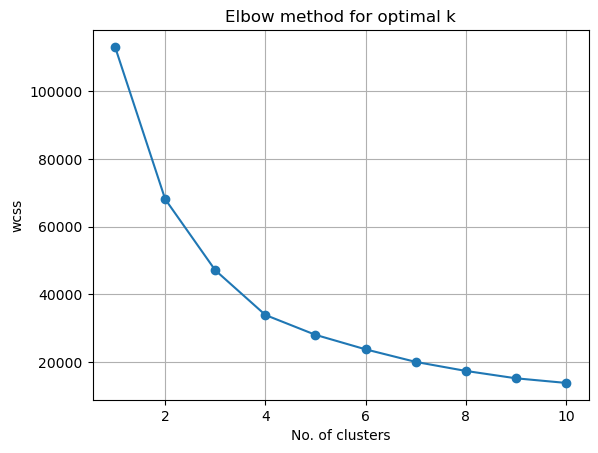

In [91]:
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel("No. of clusters")
plt.ylabel("wcss")
plt.title("Elbow method for optimal k")
plt.grid(True)
plt.show()

In [92]:
df_pca = pd.DataFrame(pca_result,columns=['pca1','pca2'])
df_pca

,pca1,pca2
0,0.894140,0.881677
1,1.651317,1.109350
2,0.134835,-0.096455
3,2.204479,1.857481
4,1.320375,-1.441046
...,...,...
28543,-0.874342,2.482910
28544,-2.965315,-0.791127
28545,-3.547105,-1.125670
28546,-3.054749,-0.374102


In [93]:
kmeans = KMeans(n_clusters=3,random_state=42)
df_pca["cluster"] = kmeans.fit_predict(df_pca)
df_pca

,pca1,pca2,cluster
0,0.894140,0.881677,2
1,1.651317,1.109350,2
2,0.134835,-0.096455,1
3,2.204479,1.857481,2
4,1.320375,-1.441046,1
...,...,...,...
28543,-0.874342,2.482910,0
28544,-2.965315,-0.791127,0
28545,-3.547105,-1.125670,0
28546,-3.054749,-0.374102,0


In [94]:
df_pca.isnull().sum()

pca1       0
pca2       0
cluster    0
dtype: int64

In [95]:
df_balanced.reset_index(drop=True, inplace=True)
df_pca.reset_index(drop=True, inplace=True)

# Now you can safely add the cluster column
df_balanced['cluster'] = df_pca['cluster']

In [96]:
df_balanced.isnull().sum()

user_id                   0
id                        0
gender                    0
masterCategory            0
subCategory               0
articleType               0
baseColour                0
season                    0
year                      0
usage                     0
productDisplayName        0
filename                  0
link                      0
ratings                   0
review                    0
Month                     0
Price (USD)               0
gender_encoded            0
masterCategory_encoded    0
subCategory_encoded       0
articleType_encoded       0
baseColour_encoded        0
season_encoded            0
usage_encoded             0
Month_encoded             0
cluster                   0
dtype: int64

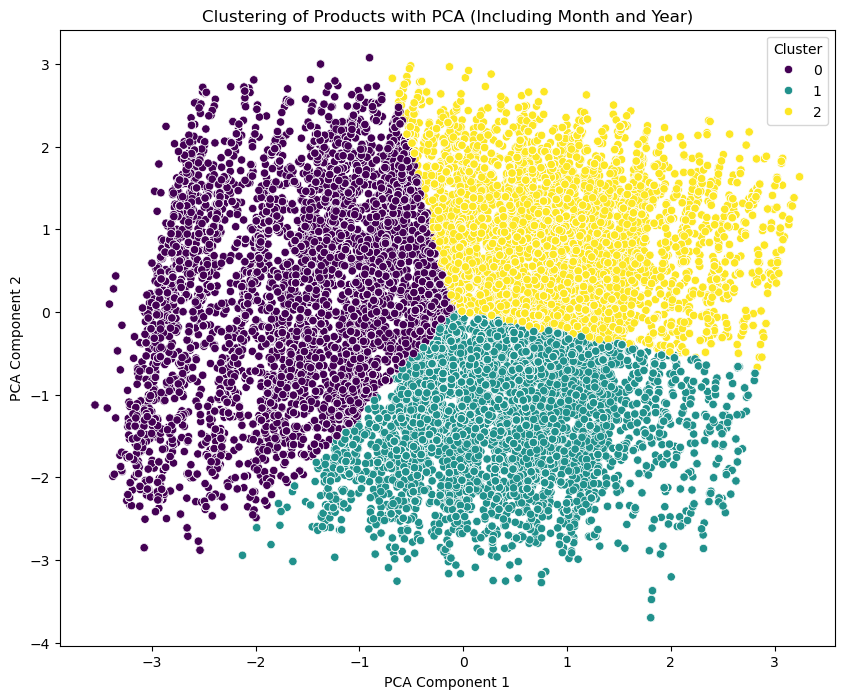

In [97]:
# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_pca,
    x='pca1', y='pca2',
    hue='cluster',
    palette='viridis'
)
plt.title('Clustering of Products with PCA (Including Month and Year)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [98]:
df_balanced.head()

,user_id,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,...,Price (USD),gender_encoded,masterCategory_encoded,subCategory_encoded,articleType_encoded,baseColour_encoded,season_encoded,usage_encoded,Month_encoded,cluster
0,19828,23248,Men,Footwear,Shoes,Formal Shoes,Brown,Fall,2011,Formal,...,39,2,2,7,16,4,0,2,3,2
1,54541,20191,Men,Apparel,Topwear,Tshirts,Grey,Fall,2011,Casual,...,44,2,1,9,62,13,0,0,1,2
2,72493,13836,Men,Apparel,Bottomwear,Shorts,Navy Blue,Fall,2011,Casual,...,56,2,1,2,44,24,0,0,7,1
3,40735,15577,Boys,Apparel,Topwear,Tshirts,Blue,Fall,2011,Casual,...,55,0,1,9,62,2,0,0,10,2
4,98470,7768,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011,Sports,...,20,2,1,9,62,13,2,5,9,1


In [99]:
df_balanced.shape

(28548, 26)

In [100]:
for i in catnames:
    print(f"{i}: {df_balanced[i + '_encoded'].unique()}")

gender: [2 0 3 4 1]
masterCategory: [2 1 0]
subCategory: [ 7  9  2  0  8  3  5 10  1  6  4 11]
articleType: [16 62 44 19 43 11 23  7 48 47 57  0  6 20 15 28 53 46 25 24 58 17 61 66
  2 52 14 49 63 26 12 54 59 18 29  8 56 65 42 13 31  4  1  9 33 34 35 51
 64 36 30  5 21 22 39 40 38 45 27 32 60 37  3 41 55 10 50 67]
baseColour: [ 4 13 24  2  1 32 12 30 41 42 31 28 39  0  9 18 15 21 35 27 17 26  6 23
 40 16 11 33 29 37 14  5  8  7 10 19  3 36 38 34 22 20 25]
season: [0 2 1 3]
usage: [2 0 5 1 6 4 3]
Month: [ 3  1  7 10  9  8  4 11  5  0  2  6]


# Image Processing

In [101]:
image_dir = r"C:\Users\tarus\infosys_springboard_internship\Fashion_Assistant_Project\images"

In [102]:
import os
df_balanced = df_balanced[df_balanced['filename'].apply(lambda x: os.path.exists(f'images/{x}'))]

In [103]:
df_balanced.shape

(28534, 26)

In [104]:
# Create a list of full image paths
image_paths = [os.path.join(image_dir, image_id) for image_id in df_balanced['filename']]

In [105]:
import os
path_not_exists = []
for path in image_paths:
    if not os.path.exists(path):
        print(f"File does not exist: {path}")
        path_not_exists.append(path[30:])

path_not_exists

[]

In [107]:
df_balanced.to_csv("datasets/df_balanced.csv", index=False)

In [68]:
# df_balanced = df_balanced.sample(5000, random_state=42)
# df_balanced.shape

In [ ]:
import numpy as np
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [168]:
# Load pretrained ResNet50 model
resnet = ResNet50(weights='imagenet', include_top=False, pooling='avg')
feature_model = Model(inputs=resnet.input, outputs=resnet.output)

def extract_features(img_path):
    try:
        img = load_img(img_path, target_size=(224, 224))
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        feat = feature_model.predict(x, verbose=0)
        return feat.flatten()
    except:
        return np.zeros(2048)


In [ ]:
features = []
for fname in tqdm(df_balanced['filename']):
    # tqdm is for getting the progress bar
    path = os.path.join('images', fname)
    features.append(extract_features(path))

X = np.array(features)


100%|██████████| 28534/28534 [1:22:23<00:00,  5.77it/s]  


In [171]:
df_balanced.baseColour.unique()

array(['Brown', 'Grey', 'Navy Blue', 'Blue', 'Black', 'Red', 'Green',
       'Pink', 'White', 'Yellow', 'Purple', 'Orange', 'Teal', 'Beige',
       'Cream', 'Maroon', 'Khaki', 'Multi', 'Silver', 'Olive', 'Magenta',
       'Off White', 'Charcoal', 'Mustard', 'Turquoise Blue', 'Lavender',
       'Gold', 'Rust', 'Peach', 'Tan', 'Grey Melange', 'Burgundy',
       'Copper', 'Coffee Brown', 'Fluorescent Green', 'Mauve', 'Bronze',
       'Steel', 'Taupe', 'Sea Green', 'Mushroom Brown', 'Metallic',
       'Nude'], dtype=object)

In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

def train_label_predictors(X, df, target_columns):
    trained_models = {}
    label_encoders = {}

    for target in target_columns:
        print(f"\nTraining model for: {target}")

        # Encode target labels
        le = LabelEncoder()
        y = le.fit_transform(df[target])
        label_encoders[target] = le

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train classifier
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
        clf.fit(X_train, y_train)
        trained_models[target] = clf

        # Evaluate
        y_pred = clf.predict(X_test)
        print(f"\nClassification Report for {target}:")
        print(classification_report(
            y_test, y_pred,
            labels=le.transform(le.classes_),
            target_names=le.classes_
        ))

    return trained_models, label_encoders


In [332]:
target_cols = ['articleType','subCategory', 'baseColour', 'gender', 'season', 'usage']
models, encoders = train_label_predictors(X, df_balanced, target_cols)



Training model for: articleType

Classification Report for articleType:
                     precision    recall  f1-score   support

          Backpacks       0.95      0.99      0.97       139
             Bangle       1.00      0.96      0.98        26
              Belts       0.98      0.99      0.99       134
            Blazers       0.00      0.00      0.00         1
            Booties       0.00      0.00      0.00         0
           Bracelet       1.00      0.95      0.97        19
             Capris       0.88      0.78      0.82        27
       Casual Shoes       0.92      0.97      0.94       730
           Churidar       0.00      0.00      0.00         2
           Clutches       0.94      0.59      0.73        27
            Dresses       0.00      0.00      0.00         0
         Duffel Bag       1.00      0.10      0.18        10
            Dupatta       1.00      0.08      0.15        12
           Earrings       0.99      1.00      1.00       103
           

In [333]:
import joblib
import os

def save_models(models, encoders, save_dir='saved_models'):
    os.makedirs(save_dir, exist_ok=True)
    
    for label in models:
        joblib.dump(models[label], f'{save_dir}/{label}_model.pkl')
        joblib.dump(encoders[label], f'{save_dir}/{label}_encoder.pkl')
    
    print("All models and encoders saved to:", save_dir)


In [334]:
save_models(models, encoders)


All models and encoders saved to: saved_models


In [335]:
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
import matplotlib.pyplot as plt
import os

# Mapping rules (same as earlier)
gender_map = {
    'Women': ['Women', 'Unisex'],
    'Men': ['Men', 'Unisex'],
    'Unisex': ['Unisex'],
    'Boys': ['Boys', 'Unisex'],
    'Girls': ['Girls', 'Unisex']
}

season_map = {
    'Summer': ['Summer', 'Spring'],
    'Spring': ['Spring', 'Summer'],
    'Fall': ['Fall', 'Winter'],
    'Winter': ['Winter', 'Fall']
}

# Colour groupings
base_colour_map = {
    'White': ['Black', 'Navy Blue', 'Red', 'Pink', 'Beige', 'Grey', 'Blue', 'Lavender', 'Olive'],
    'Lavender': ['White', 'Beige', 'Grey', 'Pink', 'Navy Blue', 'Mauve'],
    'Steel': ['White', 'Black', 'Grey', 'Navy Blue', 'Silver'],
    'Black': ['White', 'Beige', 'Red', 'Blue', 'Pink', 'Mustard', 'Olive', 'Grey'],
    'Brown': ['Beige', 'White', 'Olive', 'Mustard', 'Cream', 'Khaki', 'Tan'],
    'Grey': ['Black', 'White', 'Red', 'Blue', 'Green', 'Beige', 'Pink'],
    'Blue': ['White', 'Beige', 'Red', 'Mustard', 'Grey', 'Pink', 'Yellow'],
    'Green': ['White', 'Beige', 'Brown', 'Mustard', 'Olive'],
    'Silver': ['Black', 'White', 'Grey', 'Navy Blue', 'Purple'],
    'Beige': ['Black', 'White', 'Blue', 'Pink', 'Red', 'Olive', 'Cream'],
    'Navy Blue': ['White', 'Beige', 'Pink', 'Yellow', 'Grey', 'Mustard', 'Lavender'],
    'Purple': ['White', 'Beige', 'Pink', 'Grey', 'Lavender', 'Silver'],
    'Red': ['Black', 'White', 'Blue', 'Beige', 'Grey', 'Gold'],
    'Pink': ['White', 'Beige', 'Grey', 'Navy Blue', 'Lavender', 'Cream'],
    'Teal': ['White', 'Beige', 'Grey', 'Brown', 'Sea Green'],
    'Gold': ['Black', 'White', 'Beige', 'Red', 'Maroon', 'Burgundy'],
    'Nude': ['White', 'Beige', 'Cream', 'Brown', 'Olive'],
    'Olive': ['Beige', 'White', 'Brown', 'Black', 'Mustard', 'Khaki', 'Rust'],
    'Tan': ['White', 'Beige', 'Brown', 'Olive', 'Cream'],
    'Maroon': ['White', 'Beige', 'Black', 'Gold', 'Cream', 'Peach'],
    'Yellow': ['Navy Blue', 'Black', 'White', 'Grey', 'Blue', 'Beige'],
    'Taupe': ['White', 'Beige', 'Brown', 'Cream', 'Pink'],
    'Orange': ['White', 'Beige', 'Blue', 'Black', 'Cream', 'Grey'],
    'Off White': ['Black', 'Beige', 'Grey', 'Blue', 'Olive'],
    'Grey Melange': ['Black', 'White', 'Beige', 'Cream'],
    'Peach': ['White', 'Beige', 'Pink', 'Grey', 'Maroon'],
    'Multi': ['White', 'Black', 'Beige', 'Grey', 'Navy Blue'],  # catch-all
    'Cream': ['Beige', 'White', 'Brown', 'Pink', 'Maroon'],
    'Coffee Brown': ['Beige', 'White', 'Cream', 'Olive', 'Khaki'],
    'Sea Green': ['White', 'Beige', 'Blue', 'Grey', 'Teal'],
    'Turquoise Blue': ['White', 'Beige', 'Navy Blue', 'Grey', 'Sea Green'],
    'Mustard': ['Navy Blue', 'White', 'Black', 'Beige', 'Olive', 'Brown'],
    'Rust': ['Beige', 'White', 'Brown', 'Olive', 'Khaki'],
    'Khaki': ['White', 'Beige', 'Brown', 'Olive', 'Cream'],
    'Charcoal': ['White', 'Beige', 'Grey', 'Black'],
    'Magenta': ['Black', 'White', 'Beige', 'Navy Blue', 'Gold'],
    'Mauve': ['White', 'Beige', 'Lavender', 'Grey', 'Pink'],
    'Bronze': ['White', 'Black', 'Beige', 'Gold', 'Brown'],
    'Burgundy': ['White', 'Beige', 'Black', 'Cream', 'Gold', 'Maroon'],
}



In [336]:
def get_complementary_base_colours(base_colour):
    return base_colour_map.get(base_colour, [base_colour])

def get_matching_gender(gender):
    return gender_map.get(gender, [gender])

def get_matching_season(season):
    return season_map.get(season, [season])


In [418]:
complementary_map = {
    'Tshirts': ['Jeans', 'Track Pants', 'Casual Shoes', 'Backpacks', 'Watches'],
    'Shirts': ['Trousers', 'Formal Shoes', 'Belts', 'Watches'],
    'Kurtas': ['Leggings', 'Dupatta', 'Earrings', 'Heels'],
    'Kurtis': ['Jeggings', 'Dupatta', 'Bracelet'],
    'Tunics': ['Leggings', 'Flats', 'Handbags'],
    'Tops': ['Skirts', 'Capris', 'Earrings'],
    'Sweatshirts': ['Track Pants', 'Sneakers', 'Backpacks'],
    'Jackets': ['Jeans', 'Tshirts', 'Booties'],
    'Shrug': ['Tops', 'Tunics', 'Jeggings'],
    'Blazers': ['Shirts', 'Trousers', 'Formal Shoes'],
    'Nehru Jackets': ['Kurtas', 'Trousers'],

    'Jeans': ['Tshirts', 'Sweatshirts', 'Casual Shoes'],
    'Trousers': ['Shirts', 'Belts', 'Formal Shoes'],
    'Track Pants': ['Sweatshirts', 'Sports Shoes'],
    'Capris': ['Tshirts', 'Flats'],
    'Jeggings': ['Tunics', 'Shrug'],
    'Leggings': ['Kurtas', 'Tunics'],
    'Patiala': ['Kurtas', 'Dupatta'],
    'Salwar': ['Kurtas', 'Dupatta'],
    'Churidar': ['Kurtas', 'Dupatta'],
    'Skirts': ['Tops', 'Heels'],
    'Shorts': ['Tshirts', 'Flip Flops'],
    'Lounge Pants': ['Tshirts', 'Flip Flops'],

    'Formal Shoes': ['Shirts', 'Trousers'],
    'Casual Shoes': ['Tshirts', 'Jeans'],
    'Sports Shoes': ['Track Pants', 'Tshirts'],
    'Flip Flops': ['Shorts', 'Lounge Pants'],
    'Heels': ['Dresses', 'Skirts'],
    'Flats': ['Tunics', 'Capris'],
    'Booties': ['Sweaters', 'Jeans'],

    'Dupatta': ['Kurtas', 'Salwar', 'Patiala'],
    'Sarees': ['Blouses', 'Jewellery Set', 'Heels'],
    'Lehenga Choli': ['Dupatta', 'Jewellery Set', 'Heels'],
    'Salwar and Dupatta': ['Kurtas', 'Heels'],

    'Dresses': ['Heels', 'Clutches', 'Earrings'],
    'Night suits': ['Slippers', 'Robe'],
    'Nightdress': ['Slippers'],
    'Rompers': ['Sneakers', 'Backpacks'],
    'Swimwear': ['Flip Flops', 'Mobile Pouch'],
    'Tracksuits': ['Sports Shoes'],

    'Wallets': ['Shirts', 'Trousers'],
    'Belts': ['Shirts', 'Trousers'],
    'Watches': ['Tshirts', 'Shirts'],
    'Backpacks': ['Tshirts', 'Jeans'],
    'Messenger Bag': ['Casual Shirts', 'Trousers'],
    'Handbags': ['Tops', 'Dresses'],
    'Clutches': ['Dresses'],
    'Duffel Bag': ['Tracksuits', 'Lounge Pants'],
    'Trolley Bag': ['Travel Accessory'],

    'Jewellery Set': ['Sarees', 'Lehenga Choli', 'Dresses'],
    'Earrings': ['Tops', 'Dresses', 'Sarees'],
    'Necklace and Chains': ['Kurtas', 'Sarees'],
    'Bangle': ['Lehenga Choli', 'Kurtas'],
    'Bracelet': ['Kurtis', 'Dresses'],
    'Pendant': ['Tops', 'Dresses'],
    'Ring': ['Sarees', 'Kurtas'],
    
    'Tablet Sleeve': ['Formal Outfits'],
    'Laptop Bag': ['Shirts', 'Blazers'],
    'Mobile Pouch': ['Casual Wear', 'Shorts'],
    'Waist Pouch': ['Tracksuits', 'Streetwear'],
    'Waistcoat': ['Shirts', 'Blazers'],

    'Rain Jacket': ['Track Pants', 'Sweatshirts'],
    'Sweaters': ['Jeans', 'Booties'],
    'Stockings': ['Skirts', 'Dresses'],

    'Trolley Bag': ['Travel Accessory'],
}


In [420]:
# def recommend_outfit_items_image_features(pred_labels, uploaded_feat, df, image_dir='images'):
#     subcat = pred_labels['subCategory']
#     base_colour = pred_labels['baseColour']
#     gender = pred_labels['gender']
#     season = pred_labels['season']

#     # Define valid matches
#     valid_colours = get_complementary_base_colours(base_colour)
#     valid_genders = get_matching_gender(gender)
#     valid_seasons = get_matching_season(season)

#     # Filter complementary items from other subcategories
#     filtered_df = df[
#         (df['subCategory'] != subcat) &
#         (df['baseColour'].isin(valid_colours)) &
#         (df['gender'].isin(valid_genders)) &
#         (df['season'].isin(valid_seasons))
#     ].copy()

#     if filtered_df.empty:
#         print("No complementary items found.")
#         return

#     print(f"Found {len(filtered_df)} potential matching items.")

#     # Extract features for filtered items
#     features = []
#     filenames = []

#     for fname in filtered_df['filename']:
#         path = os.path.join(image_dir, fname)
#         if os.path.exists(path):
#             feat = extract_features(path)
#             features.append(feat)
#             filenames.append(fname)

#     if not features:
#         print("No valid images for recommendation.")
#         return

#     features = np.array(features)

#     # Fix feature shape before similarity
#     if uploaded_feat.shape == (2048, 1):
#         uploaded_feat = uploaded_feat.T  # shape becomes (1, 2048)
#     elif uploaded_feat.ndim == 1:
#         uploaded_feat = uploaded_feat.reshape(1, -1)


#     # Compute cosine similarity
#     sims = cosine_similarity(uploaded_feat, features)[0]

#     filtered_df = filtered_df[filtered_df['filename'].isin(filenames)].copy()
#     filtered_df['similarity'] = sims

#     # Select top K
#     top_recs = filtered_df.sort_values(by='similarity', ascending=False)

#     # Display results
#     recommended_subcat = []
#     for _, row in top_recs.iterrows():
#         if row['subCategory'] in recommended_subcat or row['subCategory'] not in complementary_map.get(preds['subCategory']):
#             continue
#         print(f"\n {row['productDisplayName']}")
#         print(f" → Category: {row['subCategory']}, Colour: {row['baseColour']}")
#         print(f" → Gender: {row['gender']}, Season: {row['season']}")
#         recommended_subcat.append(row['subCategory'])

#         img_path = os.path.join(image_dir, row['filename'])

#         img = Image.open(img_path)
#         plt.imshow(img)
#         plt.axis('off')
#         plt.title(f"{row['subCategory']} - {row['baseColour']}")
#         plt.show()


In [421]:
uploaded_img = r"C:\Users\tarus\infosys_springboard_internship\images\1981.jpg"

In [422]:
# Suppose you extracted features from a new uploaded image:
new_feat = extract_features(uploaded_img).reshape(1, -1)
preds = {}

# Predict one by one:
for target in target_cols:
    pred_class = encoders[target].inverse_transform(
        [models[target].predict(new_feat)[0]]
    )[0]
    preds[target] = pred_class

preds

{'articleType': 'Shorts',
 'subCategory': 'Bottomwear',
 'baseColour': 'Green',
 'gender': 'Women',
 'season': 'Fall',
 'usage': 'Casual'}

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Features to use for similarity
similarity_cols = ['baseColour', 'gender', 'season', 'usage']

# Fit encoder once on your DataFrame
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(df_balanced[similarity_cols])


OneHotEncoder(handle_unknown='ignore')

In [423]:
from sklearn.metrics.pairwise import cosine_similarity
import os
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

def recommend_outfit_items_text_features(pred_labels, df, image_dir='images', top_k=5):
    subcat      = pred_labels['subCategory']
    article     = pred_labels['articleType']
    base_colour = pred_labels['baseColour']
    gender      = pred_labels['gender']
    season      = pred_labels['season']
    usage       = pred_labels['usage']

    # Matching gender and season logic
    valid_genders = get_matching_gender(gender)
    valid_seasons = get_matching_season(season)

    # Filter based on rules
    filtered_df = df[
        (df['subCategory'] != subcat) &
        (df['gender'].isin(valid_genders)) &
        (df['season'].isin(valid_seasons)) &
        (df['usage'] == usage)
    ].copy()

    if filtered_df.empty:
        print("No complementary items found.")
        return

    print(f"{len(filtered_df)} items after filtering.")

    # One-hot encode catalogue and input
    input_row = pd.DataFrame([{
        'baseColour': base_colour,
        'gender'    : gender,
        'season'    : season,
        'usage'     : usage
    }])

    X_input = encoder.transform(input_row[similarity_cols]).toarray()
    X_cat   = encoder.transform(filtered_df[similarity_cols]).toarray()

    print(X_input.shape)
    print(X_cat.shape)

    # Compute cosine similarity
    sims = cosine_similarity(X_input, X_cat)[0]
    filtered_df['similarity'] = sims

    # Only keep valid complementary subcategories
    valid_articles = complementary_map.get(article)
    filtered_df = filtered_df[filtered_df['articleType'].isin(valid_articles)]

    if filtered_df.empty:
        print("No matching subcategories found.")
        return

    # Get top 1 per subcategory
    top_items = (
        filtered_df
        .sort_values('similarity', ascending=False)
        .groupby('subCategory', as_index=False)
        .first()
        .sort_values('similarity', ascending=False)
        .head(top_k)
    )

    # Show results
    for _, row in top_items.iterrows():
        print(f"\n{row['productDisplayName']}")
        print(f"→ SubCategory: {row['subCategory']}, Article Type: {row['articleType']}, Colour: {row['baseColour']}")
        print(f"→ Gender: {row['gender']}, Season: {row['season']}, Usage: {row['usage']}")
        img_path = os.path.join(image_dir, row['filename'])
        if os.path.exists(img_path):
            plt.figure(figsize=(3,3))
            plt.imshow(Image.open(img_path))
            plt.axis('off')
            plt.title(f"{row['subCategory']} - {row['baseColour']}")
            plt.show()


In [424]:
df_balanced.articleType.unique()

array(['Formal Shoes', 'Tshirts', 'Shorts', 'Jackets', 'Shirts',
       'Duffel Bag', 'Kurtas', 'Casual Shoes', 'Sports Shoes', 'Socks',
       'Tops', 'Backpacks', 'Capris', 'Jeans', 'Flip Flops',
       'Lounge Pants', 'Sweatshirts', 'Skirts', 'Laptop Bag', 'Kurtis',
       'Track Pants', 'Handbags', 'Trousers', 'Wallets', 'Belts',
       'Sweaters', 'Flats', 'Stockings', 'Tunics', 'Leggings', 'Dupatta',
       'Swimwear', 'Tracksuits', 'Heels', 'Messenger Bag', 'Churidar',
       'Tights', 'Waistcoat', 'Sarees', 'Earrings', 'Necklace and Chains',
       'Booties', 'Bangle', 'Clutches', 'Night suits', 'Nightdress',
       'Patiala', 'Suspenders', 'Waist Pouch', 'Pendant', 'Mobile Pouch',
       'Bracelet', 'Jeggings', 'Jewellery Set', 'Rompers', 'Salwar',
       'Ring', 'Shrug', 'Lehenga Choli', 'Nehru Jackets', 'Trolley Bag',
       'Rain Jacket', 'Blazers', 'Salwar and Dupatta', 'Tablet Sleeve',
       'Dresses', 'Watches'], dtype=object)

Subcategory:  Bottomwear
Article type:  Shorts
Colour:  Green
Gender:  Women
Season:  Fall
Usage:  Casual


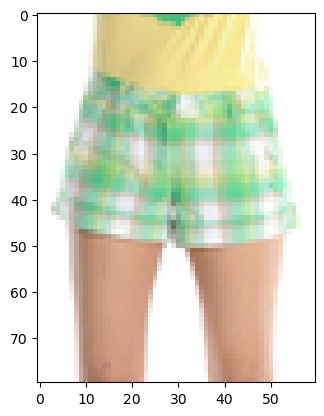

In [425]:
plt.imshow(Image.open(uploaded_img))
print("Subcategory: ",preds['subCategory'])
print("Article type: ",preds['articleType'])
print("Colour: ",preds['baseColour'])
print("Gender: ",preds['gender'])
print("Season: ",preds['season'])
print("Usage: ",preds['usage'])

2367 items after filtering.
(1, 60)
(2367, 60)

ADIDAS Women Polka Green Flip Flops
→ SubCategory: Flip Flops, Article Type: Flip Flops, Colour: Green
→ Gender: Women, Season: Fall, Usage: Casual


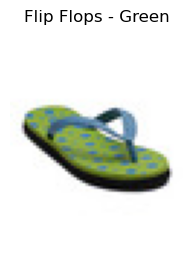


Puma Women's Heroes Green T-shirt
→ SubCategory: Topwear, Article Type: Tshirts, Colour: Green
→ Gender: Women, Season: Fall, Usage: Casual


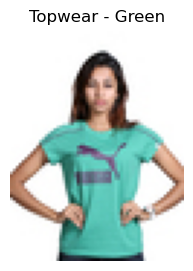

In [426]:
recommend_outfit_items_text_features(preds, df_balanced, image_dir='images')

In [400]:
# recommend_outfit_items_image_features(preds, new_feat, df_balanced, image_dir='images')

In [417]:
df_balanced.articleType.unique()

array(['Formal Shoes', 'Tshirts', 'Shorts', 'Jackets', 'Shirts',
       'Duffel Bag', 'Kurtas', 'Casual Shoes', 'Sports Shoes', 'Socks',
       'Tops', 'Backpacks', 'Capris', 'Jeans', 'Flip Flops',
       'Lounge Pants', 'Sweatshirts', 'Skirts', 'Laptop Bag', 'Kurtis',
       'Track Pants', 'Handbags', 'Trousers', 'Wallets', 'Belts',
       'Sweaters', 'Flats', 'Stockings', 'Tunics', 'Leggings', 'Dupatta',
       'Swimwear', 'Tracksuits', 'Heels', 'Messenger Bag', 'Churidar',
       'Tights', 'Waistcoat', 'Sarees', 'Earrings', 'Necklace and Chains',
       'Booties', 'Bangle', 'Clutches', 'Night suits', 'Nightdress',
       'Patiala', 'Suspenders', 'Waist Pouch', 'Pendant', 'Mobile Pouch',
       'Bracelet', 'Jeggings', 'Jewellery Set', 'Rompers', 'Salwar',
       'Ring', 'Shrug', 'Lehenga Choli', 'Nehru Jackets', 'Trolley Bag',
       'Rain Jacket', 'Blazers', 'Salwar and Dupatta', 'Tablet Sleeve',
       'Dresses', 'Watches'], dtype=object)